<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Libraries" data-toc-modified-id="Libraries-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Libraries</a></span></li><li><span><a href="#Train-losses" data-toc-modified-id="Train-losses-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Train losses</a></span><ul class="toc-item"><li><span><a href="#Train-loss-stats-across-user-training" data-toc-modified-id="Train-loss-stats-across-user-training-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Train loss stats across user training</a></span></li><li><span><a href="#Model-with-1-trained-user" data-toc-modified-id="Model-with-1-trained-user-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Model with 1 trained user</a></span><ul class="toc-item"><li><span><a href="#All-statistics-(1)" data-toc-modified-id="All-statistics-(1)-2.2.1"><span class="toc-item-num">2.2.1&nbsp;&nbsp;</span>All statistics (1)</a></span></li><li><span><a href="#Mean-(1)" data-toc-modified-id="Mean-(1)-2.2.2"><span class="toc-item-num">2.2.2&nbsp;&nbsp;</span>Mean (1)</a></span></li><li><span><a href="#Mean-between-lower-and-upper-quartile-(1)" data-toc-modified-id="Mean-between-lower-and-upper-quartile-(1)-2.2.3"><span class="toc-item-num">2.2.3&nbsp;&nbsp;</span>Mean between lower and upper quartile (1)</a></span></li></ul></li><li><span><a href="#Model-with-400-trained-users" data-toc-modified-id="Model-with-400-trained-users-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Model with 400 trained users</a></span><ul class="toc-item"><li><span><a href="#All-statistics-(400)" data-toc-modified-id="All-statistics-(400)-2.3.1"><span class="toc-item-num">2.3.1&nbsp;&nbsp;</span>All statistics (400)</a></span></li><li><span><a href="#Mean-(400)" data-toc-modified-id="Mean-(400)-2.3.2"><span class="toc-item-num">2.3.2&nbsp;&nbsp;</span>Mean (400)</a></span></li><li><span><a href="#Mean-between-lower-and-upper-quartile-(400)" data-toc-modified-id="Mean-between-lower-and-upper-quartile-(400)-2.3.3"><span class="toc-item-num">2.3.3&nbsp;&nbsp;</span>Mean between lower and upper quartile (400)</a></span></li></ul></li><li><span><a href="#Train-loss---Accuracy-Correlation" data-toc-modified-id="Train-loss---Accuracy-Correlation-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Train loss - Accuracy Correlation</a></span><ul class="toc-item"><li><span><a href="#Model-(1)" data-toc-modified-id="Model-(1)-2.4.1"><span class="toc-item-num">2.4.1&nbsp;&nbsp;</span>Model (1)</a></span></li><li><span><a href="#Model-(400)" data-toc-modified-id="Model-(400)-2.4.2"><span class="toc-item-num">2.4.2&nbsp;&nbsp;</span>Model (400)</a></span></li></ul></li><li><span><a href="#Separate-train-loss-plots" data-toc-modified-id="Separate-train-loss-plots-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Separate train loss plots</a></span><ul class="toc-item"><li><span><a href="#All-10-epochs-(1)" data-toc-modified-id="All-10-epochs-(1)-2.5.1"><span class="toc-item-num">2.5.1&nbsp;&nbsp;</span>All 10 epochs (1)</a></span></li><li><span><a href="#All-10-epochs-(400)" data-toc-modified-id="All-10-epochs-(400)-2.5.2"><span class="toc-item-num">2.5.2&nbsp;&nbsp;</span>All 10 epochs (400)</a></span></li></ul></li></ul></li></ul></div>

# Libraries

In [2]:
%load_ext autoreload
%autoreload 2

In [8]:
#OS libs
import os
import sys
from pathlib import Path
from io import StringIO
# File management
from util_functions.file_management import (filter_by, sort_by, all_user_name_id,
                                            split_pred, split_data, split_loss)
from util_functions.plot_loss import (get_train_losses_single_user, plot_single_train_loss,
                                      plot_train_loss_stats)
#Data handling libs
import pandas as pd
from tqdm import tqdm
from chess.pgn import read_game, BaseVisitor
import chess.engine

losses_m1_folder = os.path.join(os.getcwd(),'dt_chess','m1_10_epochs','training_losses')
losses_m400_folder = os.path.join(os.getcwd(),'dt_chess',"m400_10_epochs","training_losses")

# Train losses

## Train loss stats across user training

## Model with 1 trained user

In [32]:
# get loss files
loss_df = get_train_losses_single_user(losses_m1_folder)
loss_stats = loss_df.describe().T
display(loss_stats)

,count,mean,std,min,25%,50%,75%,max
1,2355.0,4.349157,1.041613,2.899043,3.459117,4.044686,5.189452,8.473842
2,2355.0,2.699768,0.215241,2.245361,2.520331,2.677754,2.862112,3.297941
3,2355.0,2.178220,0.105272,1.889878,2.099590,2.176900,2.251595,2.505889
4,2355.0,1.921363,0.062369,1.713161,1.879765,1.921282,1.964223,2.145415
5,2355.0,1.830860,0.057696,1.641873,1.793160,1.828809,1.868552,2.012985
6,2355.0,1.828417,0.062413,1.636451,1.786224,1.827091,1.870743,2.093728
7,2355.0,1.877707,0.068412,1.661104,1.830109,1.878389,1.923711,2.134420
8,2355.0,1.852416,0.059738,1.660105,1.813911,1.852366,1.893223,2.039301
9,2355.0,1.697049,0.064881,1.478569,1.653422,1.698357,1.740847,1.894049
10,2355.0,1.418207,0.077775,1.172830,1.361737,1.420731,1.477425,1.657108


### All statistics (1)

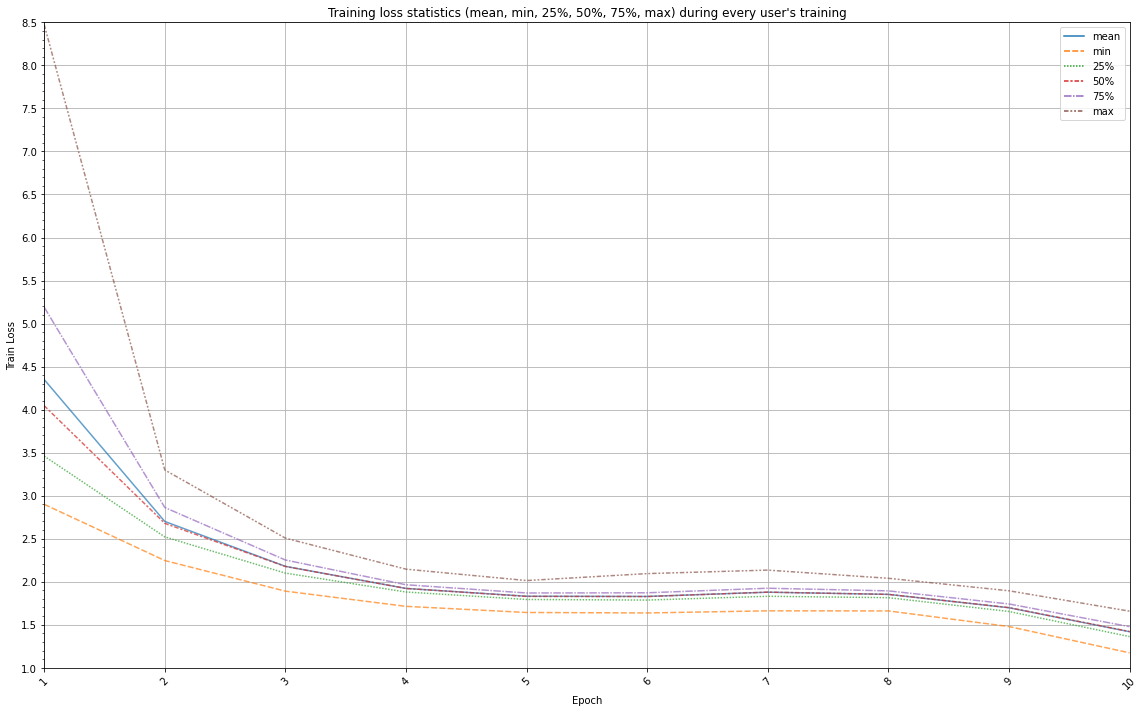

In [23]:
%matplotlib inline
plot_train_loss_stats(loss_stats, ['mean', 'min', '25%', '50%', '75%', 'max'], x_label='Epoch')

### Mean (1)

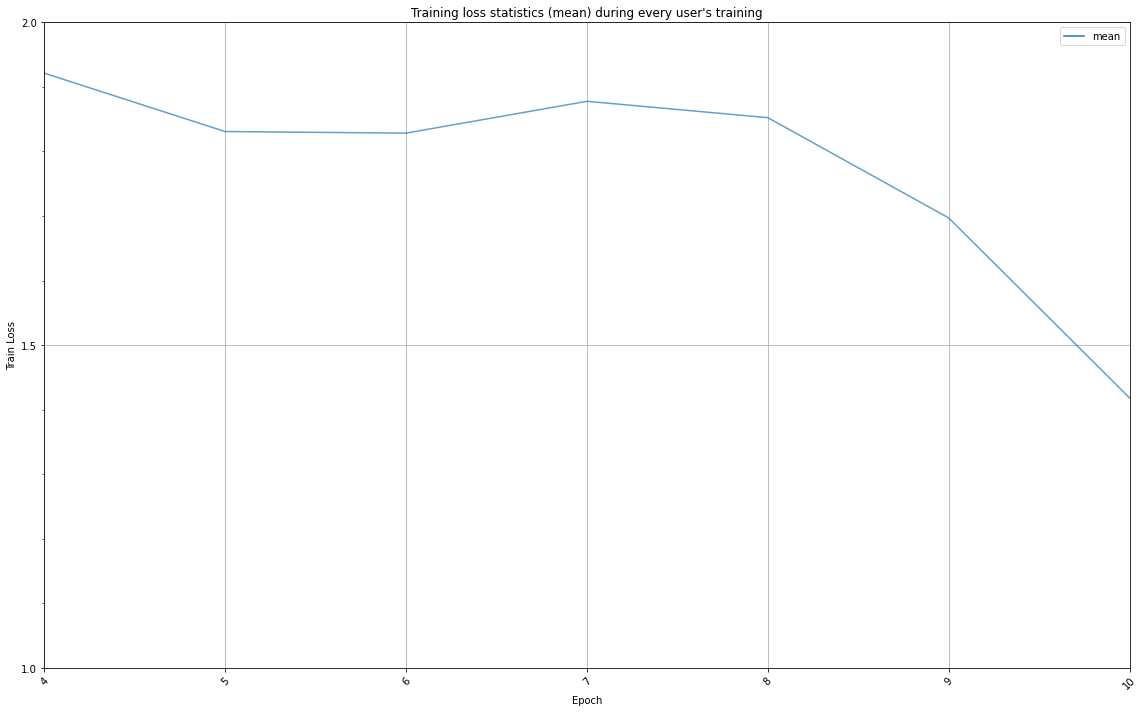

In [24]:
%matplotlib inline
plot_train_loss_stats(loss_stats[3:], ['mean'], x_label='Epoch')

### Mean between lower and upper quartile (1)

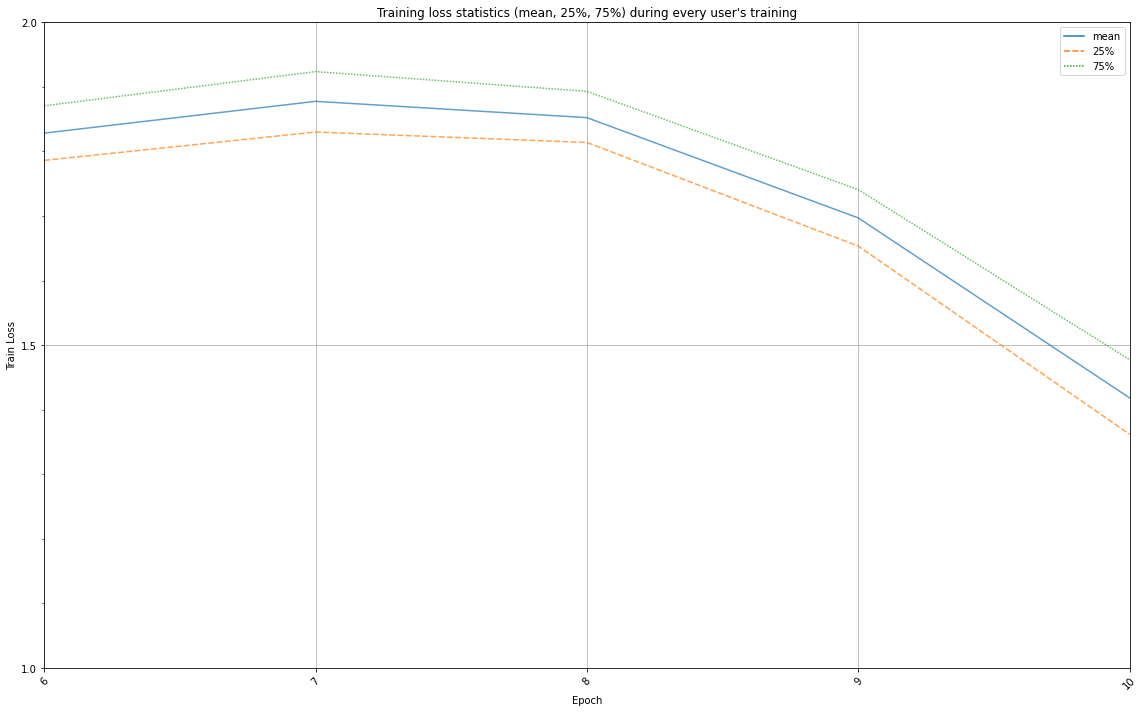

In [27]:
%matplotlib inline
plot_train_loss_stats(loss_stats[5:], ['mean','25%','75%'], x_label='Epoch')

## Model with 400 trained users

In [34]:
# get loss files
loss_400_df = get_train_losses_single_user(losses_m400_folder)
loss_400_stats = loss_400_df.describe().T
display(loss_400_stats)

,count,mean,std,min,25%,50%,75%,max
1,2355.0,4.349157,1.041613,2.899043,3.459117,4.044686,5.189452,8.473842
2,2355.0,2.015812,0.185471,1.665842,1.883565,1.978782,2.105738,2.905103
3,2355.0,1.663899,0.064810,1.453412,1.619272,1.664445,1.708681,1.872702
4,2355.0,1.517845,0.048647,1.342229,1.485785,1.517071,1.550752,1.692545
5,2355.0,1.480221,0.048139,1.325820,1.446774,1.479723,1.513093,1.659365
6,2355.0,1.506459,0.058923,1.330193,1.466628,1.506389,1.544729,1.703584
7,2355.0,1.595363,0.068709,1.407326,1.547608,1.597104,1.641916,1.819074
8,2355.0,1.650935,0.062657,1.420985,1.608690,1.653243,1.695683,1.843607
9,2355.0,1.609059,0.055598,1.399052,1.570674,1.608762,1.648250,1.812573
10,2355.0,1.457071,0.062008,1.241894,1.416631,1.457213,1.499285,1.682018


### All statistics (400)

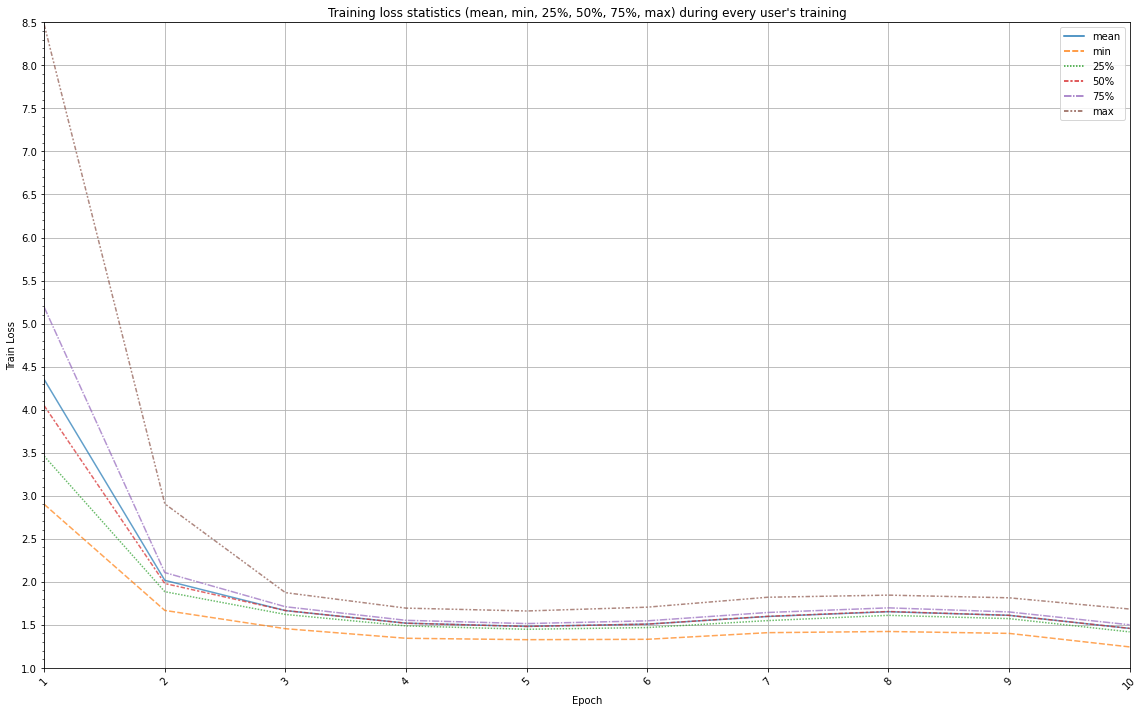

In [35]:
%matplotlib inline
plot_train_loss_stats(loss_400_stats, ['mean', 'min', '25%', '50%', '75%', 'max'], x_label='Epoch')

### Mean (400)

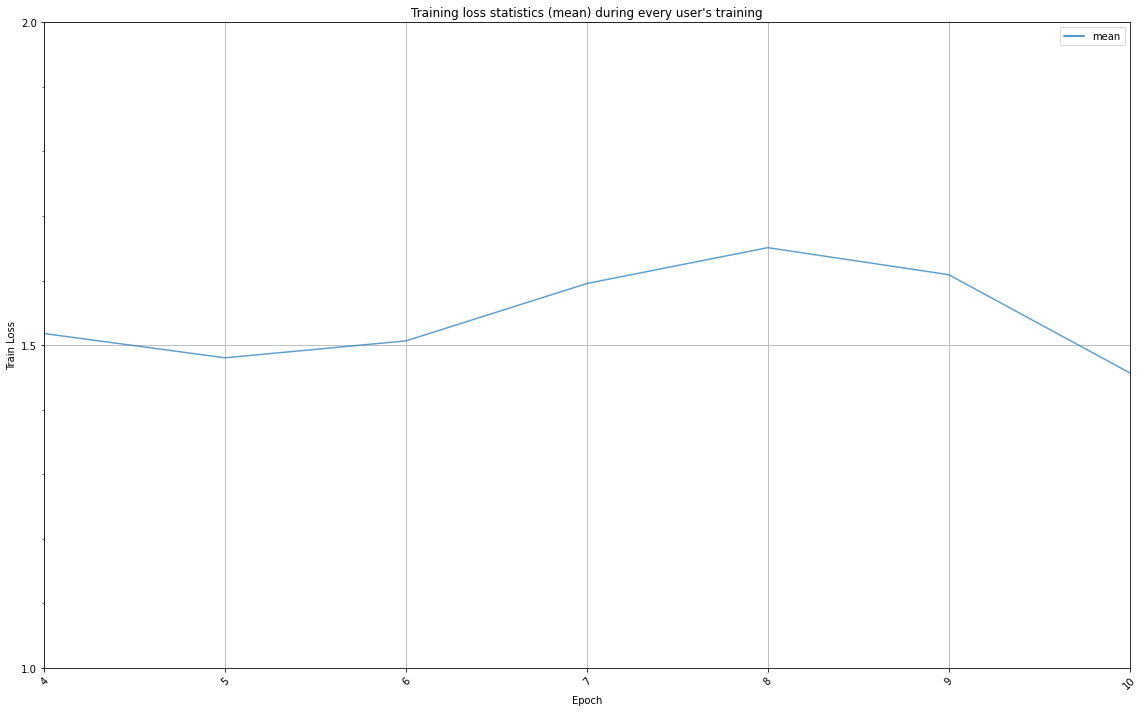

In [36]:
%matplotlib inline
plot_train_loss_stats(loss_400_stats[3:], ['mean'], x_label='Epoch')

### Mean between lower and upper quartile (400)

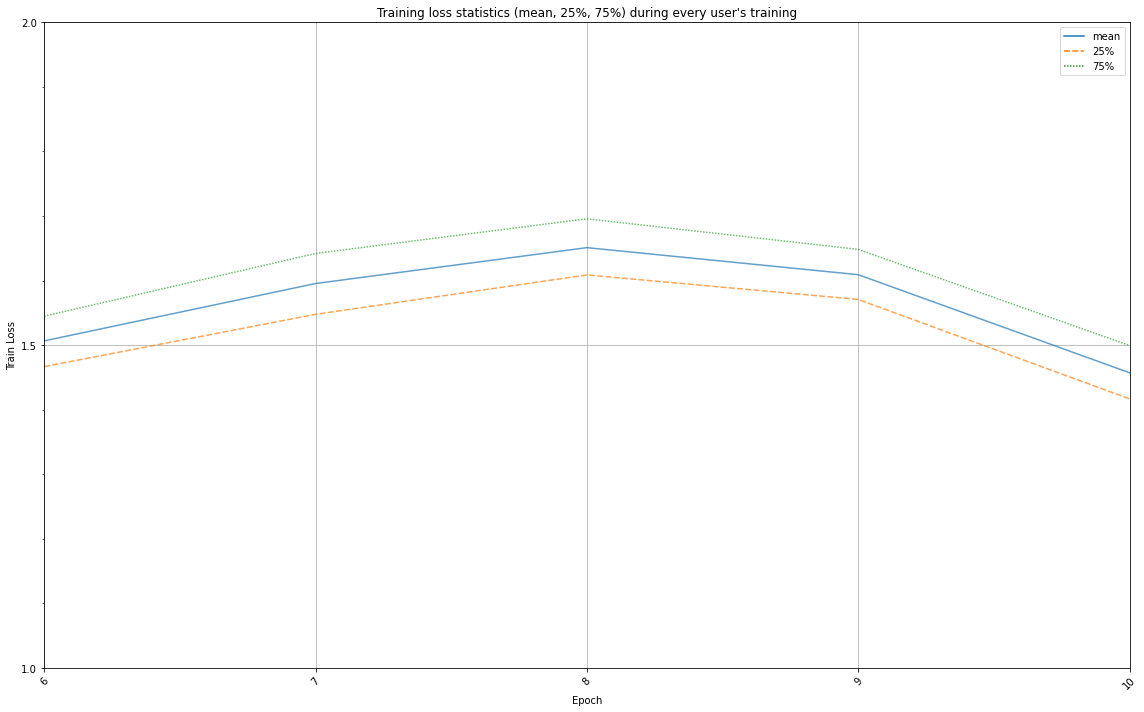

In [37]:
%matplotlib inline
plot_train_loss_stats(loss_400_stats[5:], ['mean','25%','75%'], x_label='Epoch')

## Train loss - Accuracy Correlation

In [39]:
from util_functions.file_management import (sort_by, split_pred, split_data)
from util_functions.plot_predictions import (get_stats_for_all_predictions)
data_folder = os.path.join(os.getcwd(),'dt_chess','datasets')
dt_pred_folder = os.path.join(os.getcwd(),'dt_chess','m1_10_epochs','predictions')
pred_files_user = sort_by(os.listdir(dt_pred_folder), split_pred, [('user_epochs', False)])
dt_pred_400_folder = os.path.join(os.getcwd(),'dt_chess','m400_10_epochs','predictions')
pred_files_400_user = sort_by(os.listdir(dt_pred_400_folder), split_pred, [('user_epochs', False)])

user_df = get_stats_for_all_predictions(dt_pred_folder, pred_files_user, data_folder)
user_df.index += 1
user_400_df = get_stats_for_all_predictions(dt_pred_400_folder, pred_files_400_user, data_folder)
user_400_df.index += 1

100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:24<00:00,  2.43s/it]


### Model (1)

In [57]:
print("Training loss - Accuracy correlation for model with 1 trained user")
for stat in ['mean','min','max','25%','50%','75%']:
    print((f"Top 1 accuracy correlation with Training loss {stat: <4}: "
           f"{user_df['top_1_accuracy'].corr(loss_stats[stat])}"))

Training loss - Accuracy correlation for model with 1 trained user
Top 1 accuracy correlation with Training loss mean: -0.7198953753585889
Top 1 accuracy correlation with Training loss min : -0.6179454864131141
Top 1 accuracy correlation with Training loss max : -0.7828381155771066
Top 1 accuracy correlation with Training loss 25% : -0.6628641949954949
Top 1 accuracy correlation with Training loss 50% : -0.7023598315997802
Top 1 accuracy correlation with Training loss 75% : -0.7454091412048303


### Model (400)

In [58]:
print("Training loss - Accuracy correlation for model with 400 trained user")
for stat in ['mean','min','max','25%','50%','75%']:
    print((f"Top 1 accuracy correlation with Training loss {stat: <4}: "
           f"{user_400_df['top_1_accuracy'].corr(loss_400_stats[stat])}"))

Training loss - Accuracy correlation for model with 400 trained user
Top 1 accuracy correlation with Training loss mean: -0.4450399903754916
Top 1 accuracy correlation with Training loss min : -0.42037138183420264
Top 1 accuracy correlation with Training loss max : -0.4396630812502853
Top 1 accuracy correlation with Training loss 25% : -0.43951250797425606
Top 1 accuracy correlation with Training loss 50% : -0.44549074799408833
Top 1 accuracy correlation with Training loss 75% : -0.4510040554653437


## Separate train loss plots

### All 10 epochs (1)

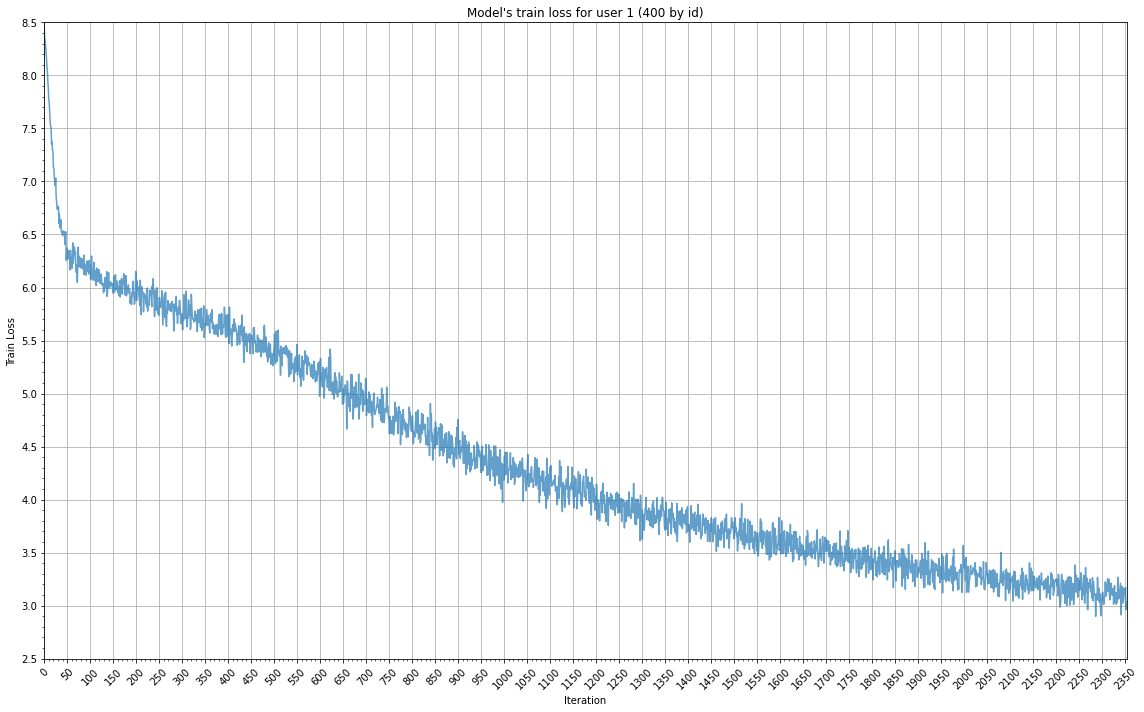

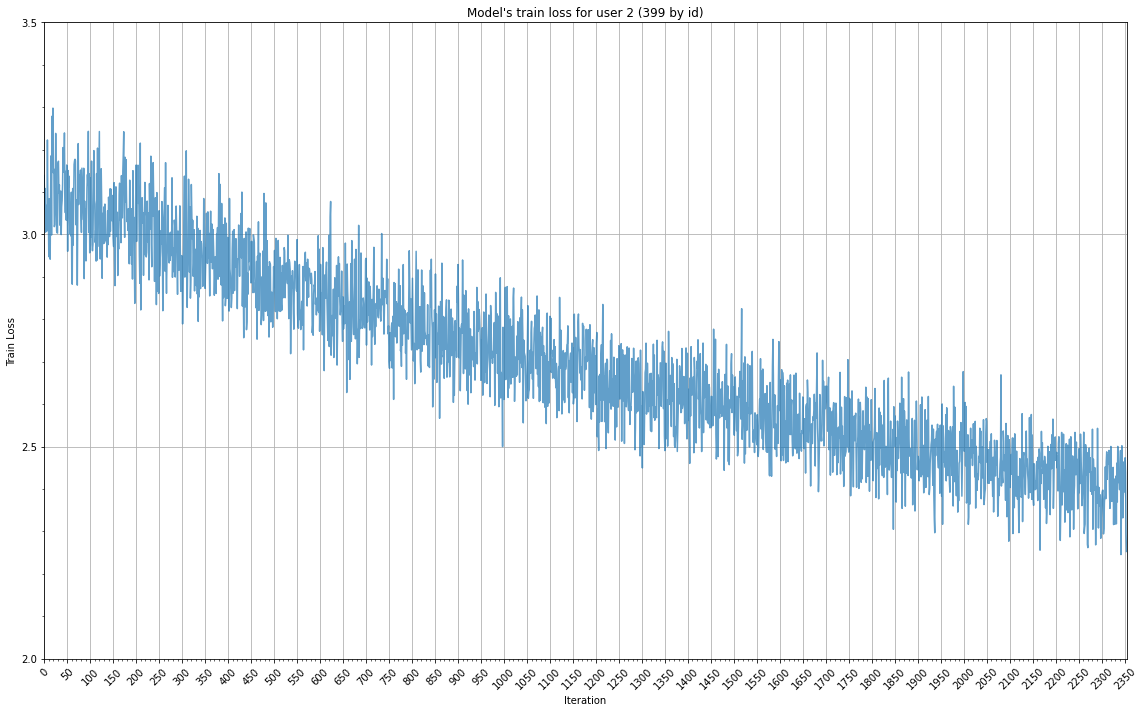

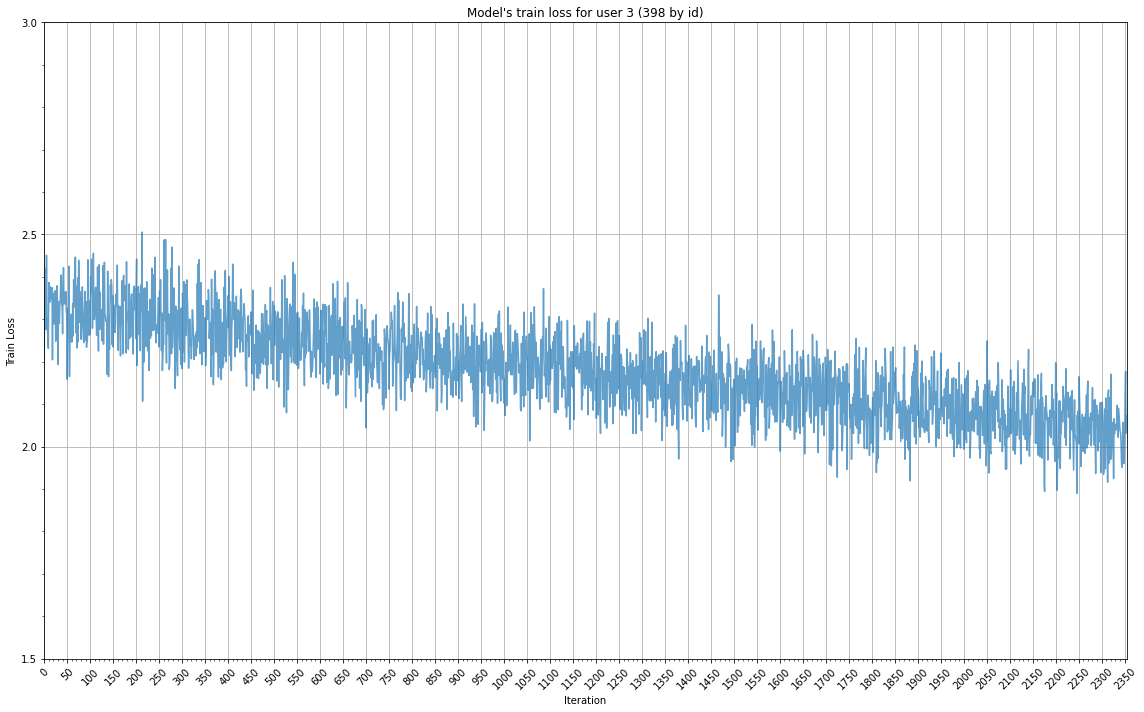

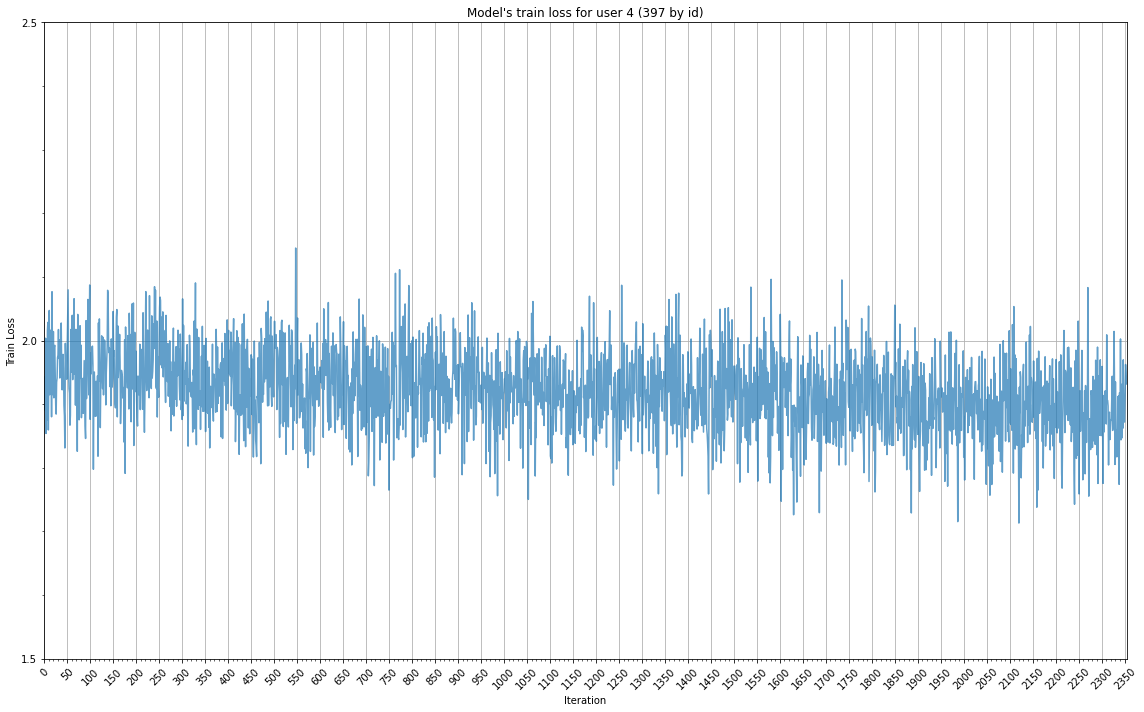

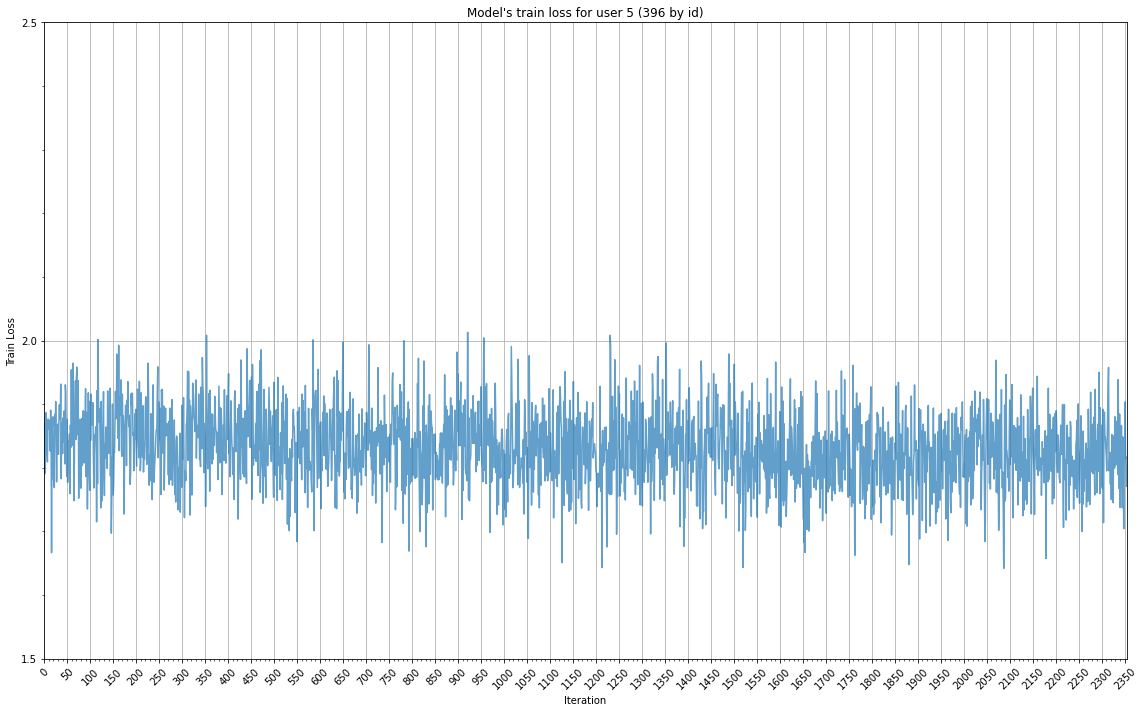

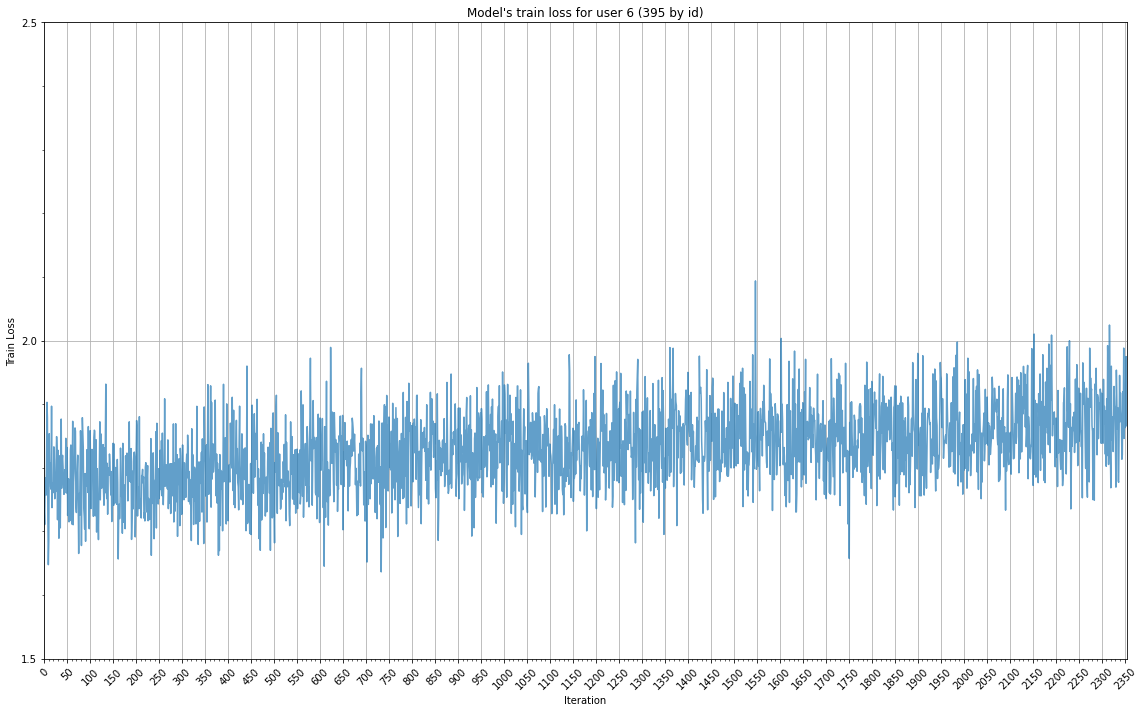

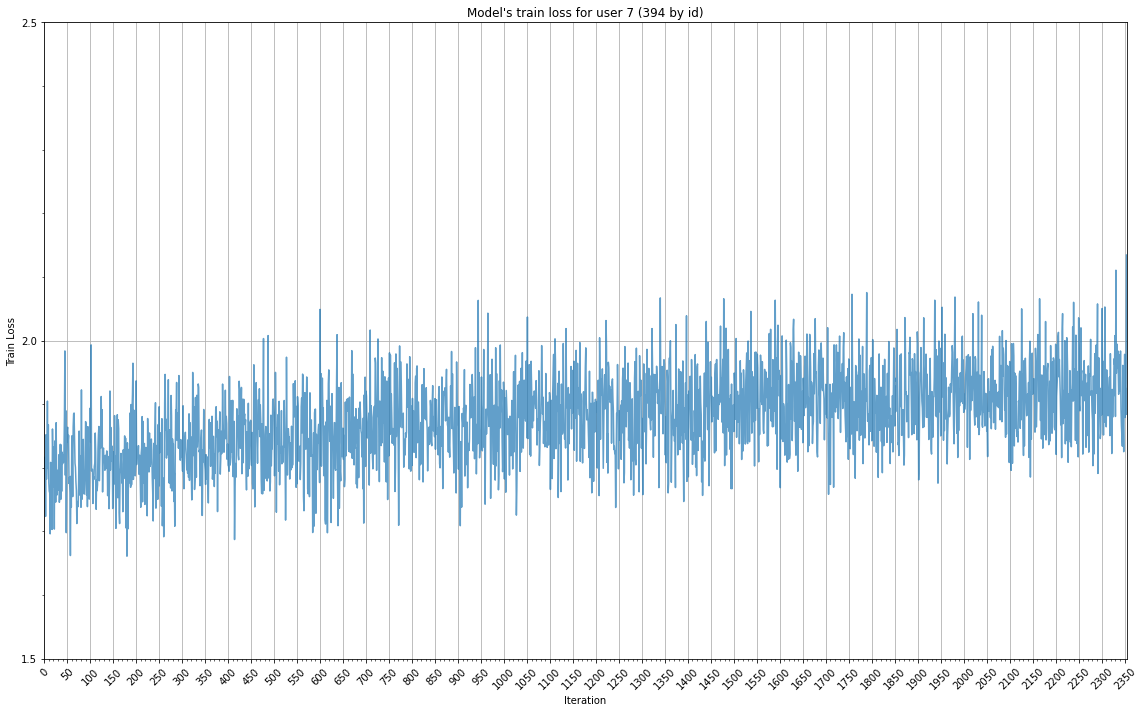

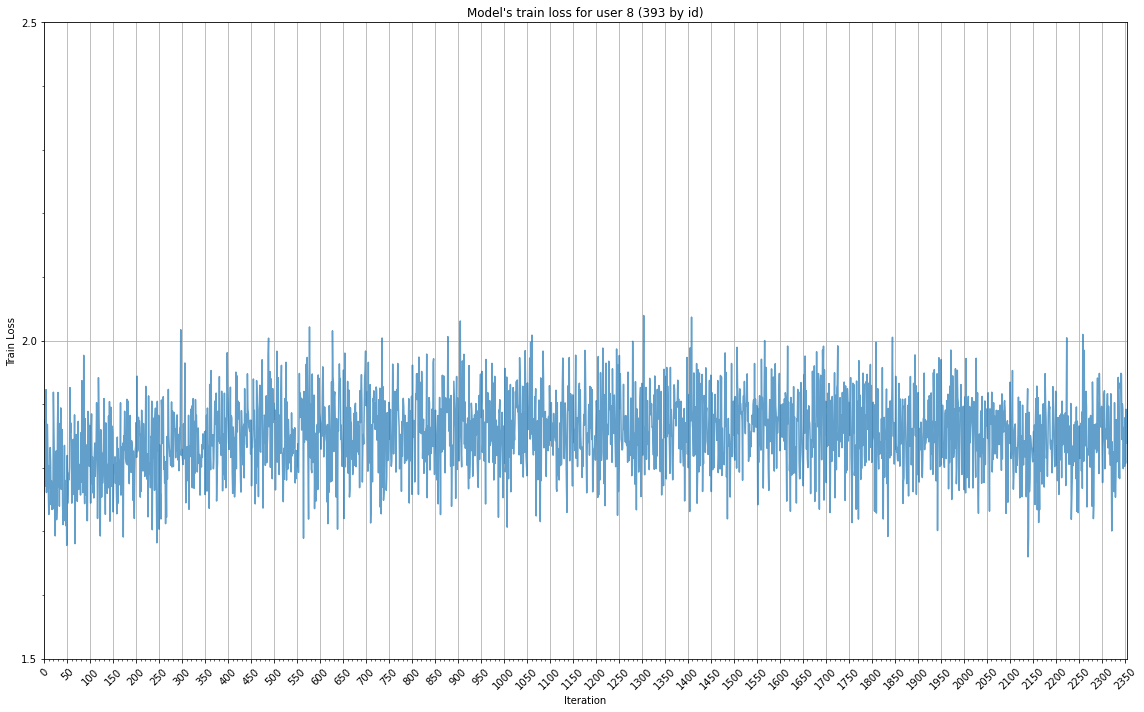

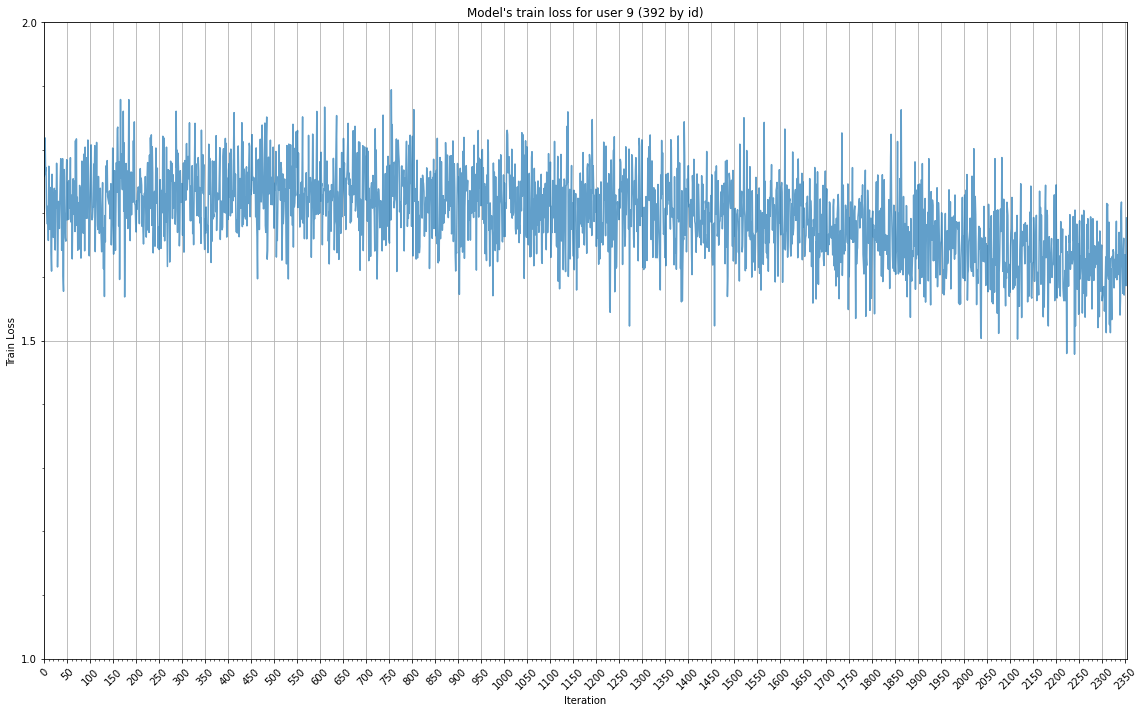

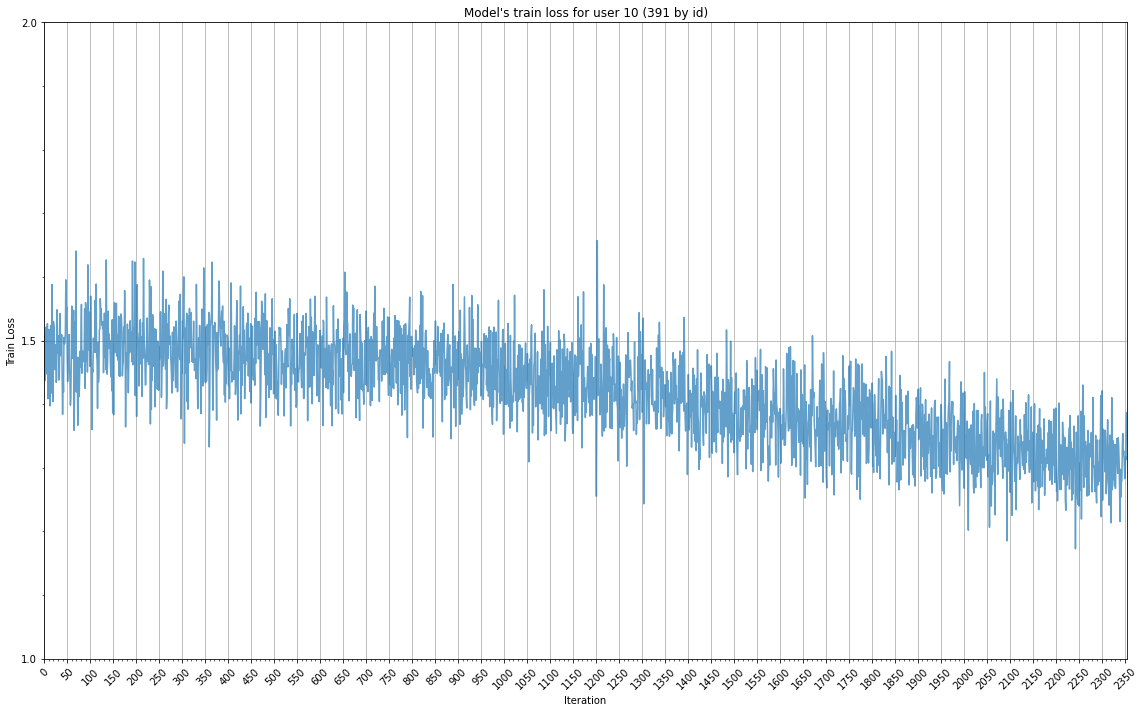

In [33]:
%matplotlib inline
for column in loss_df.columns:
    plot_single_train_loss(loss_df[column].dropna(), user_num = column)

### All 10 epochs (400)

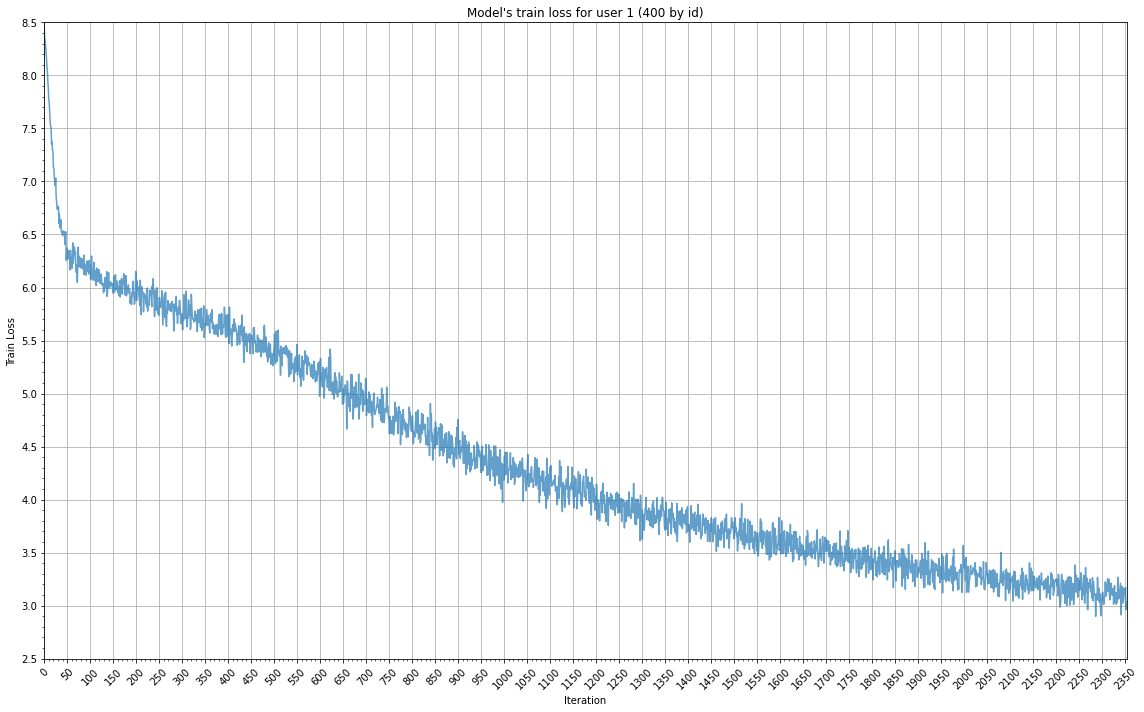

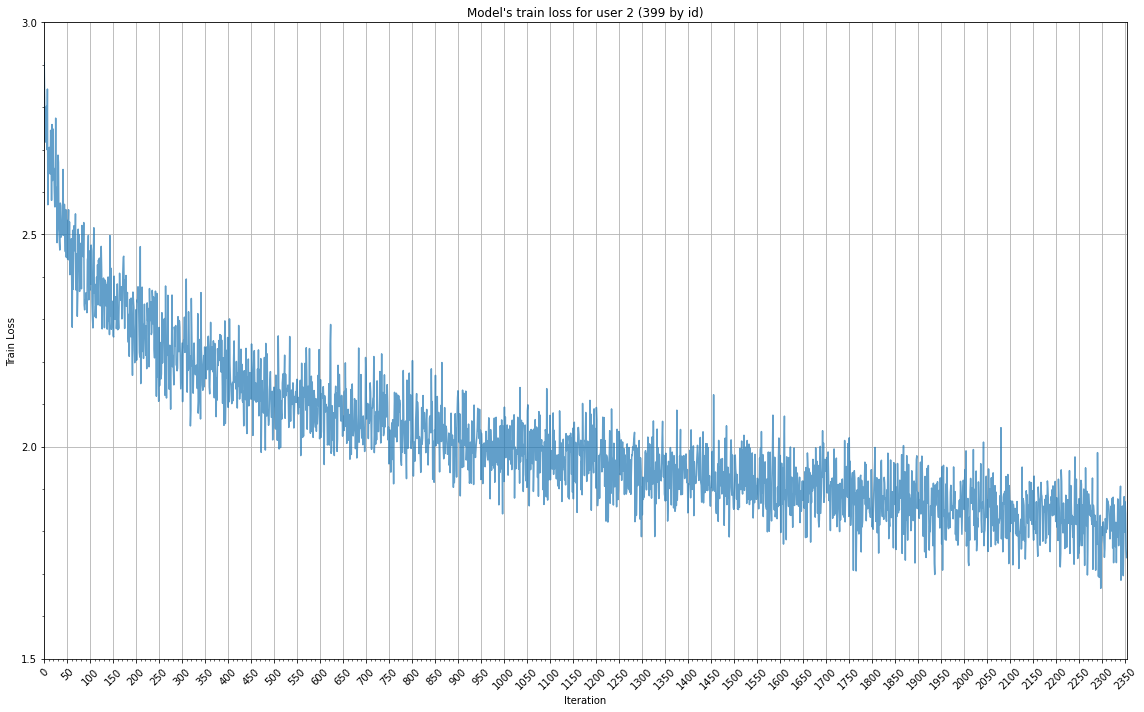

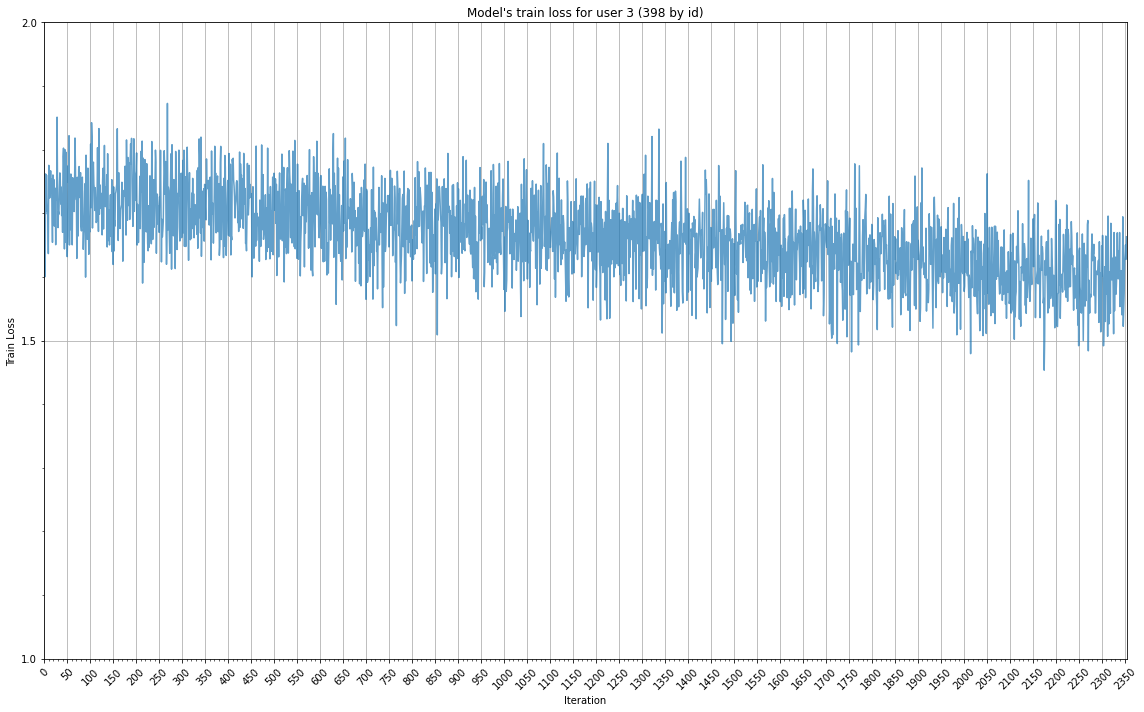

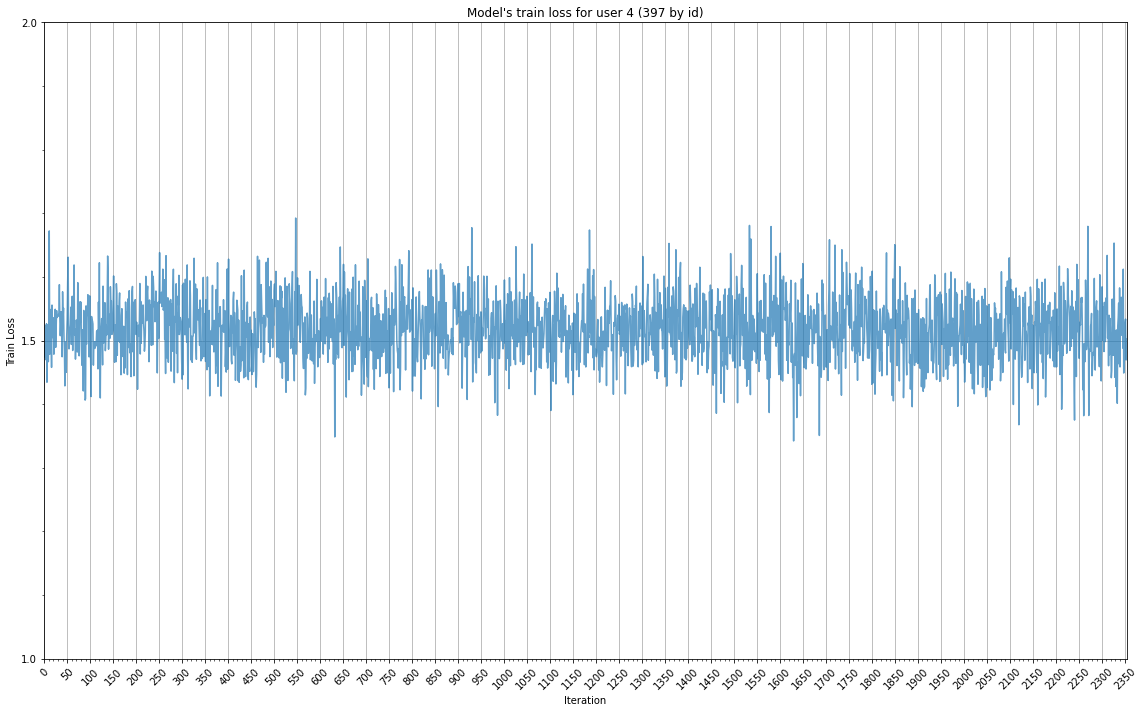

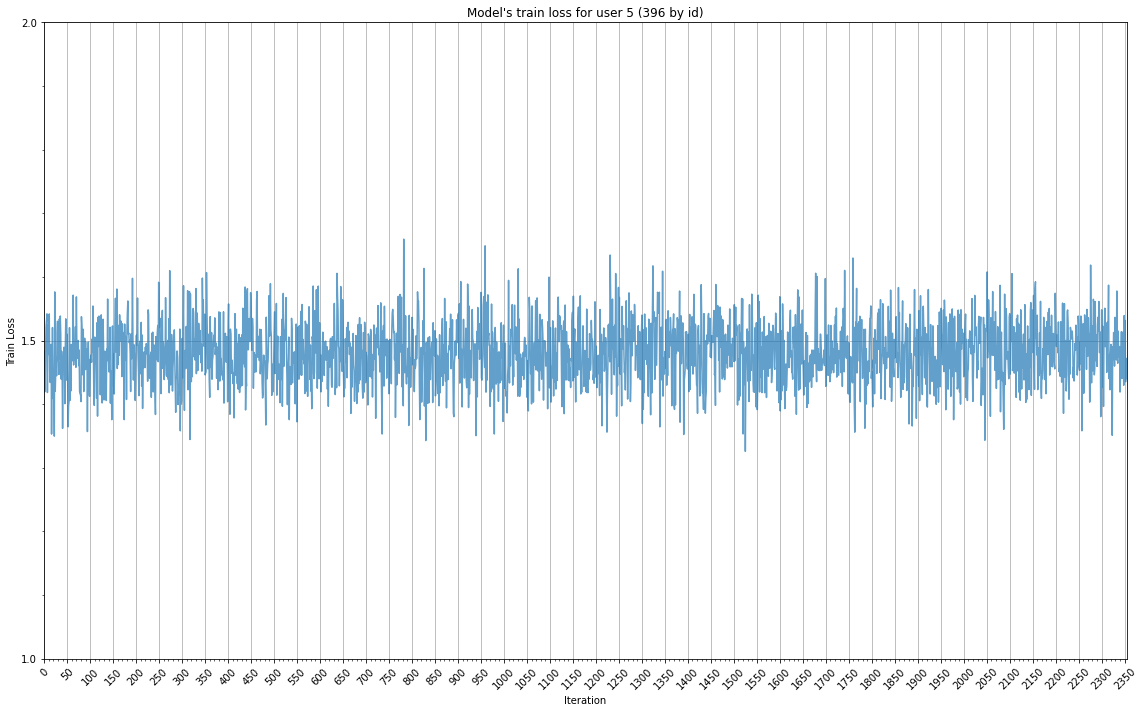

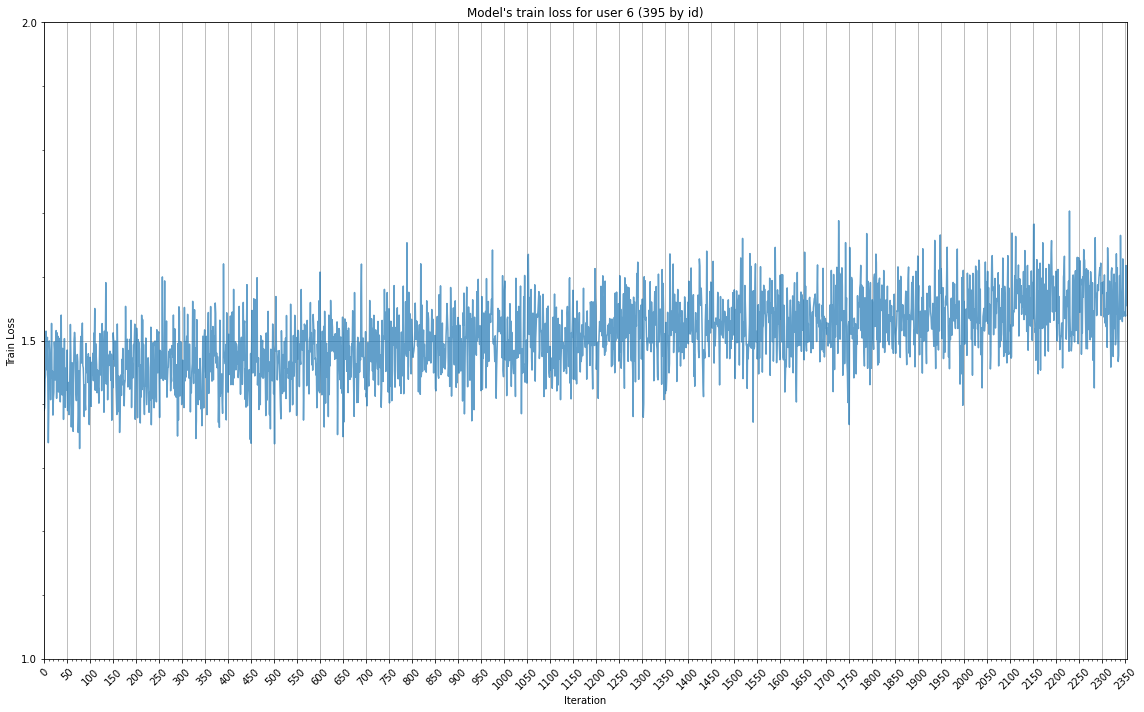

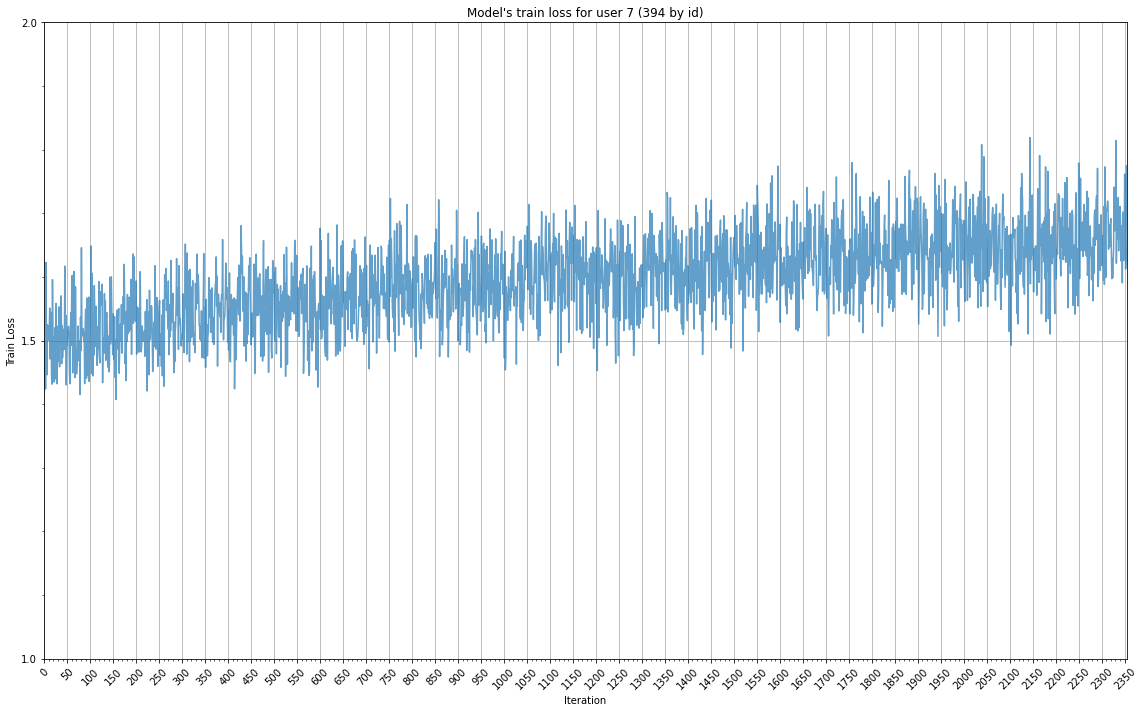

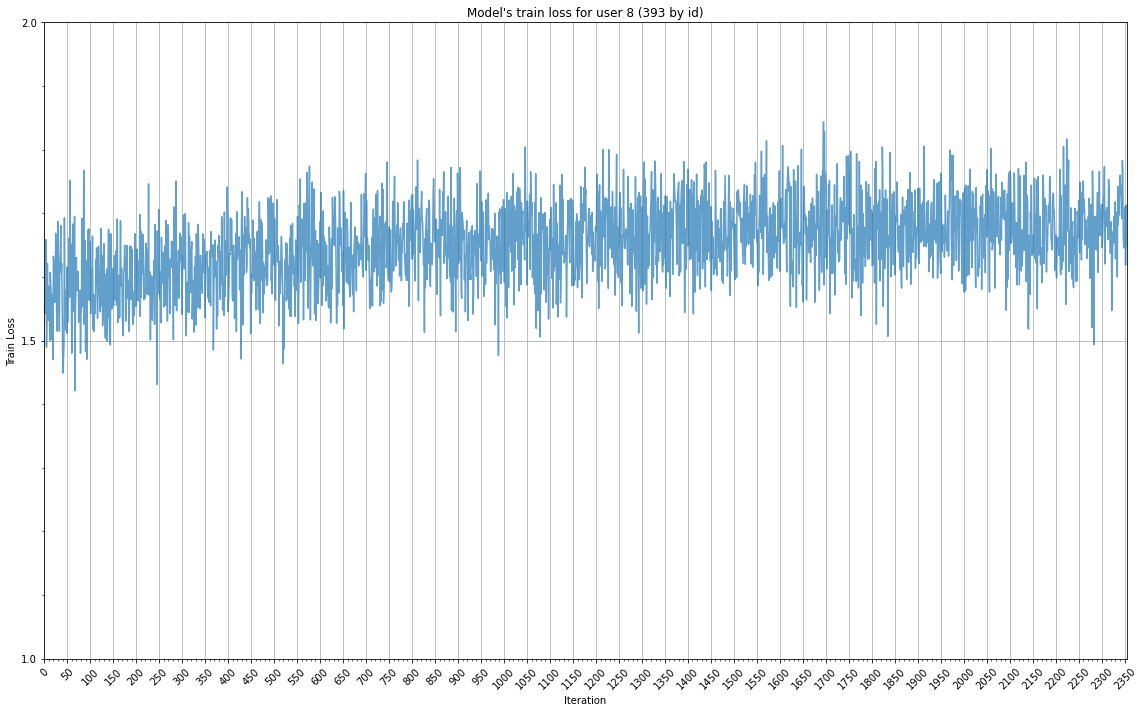

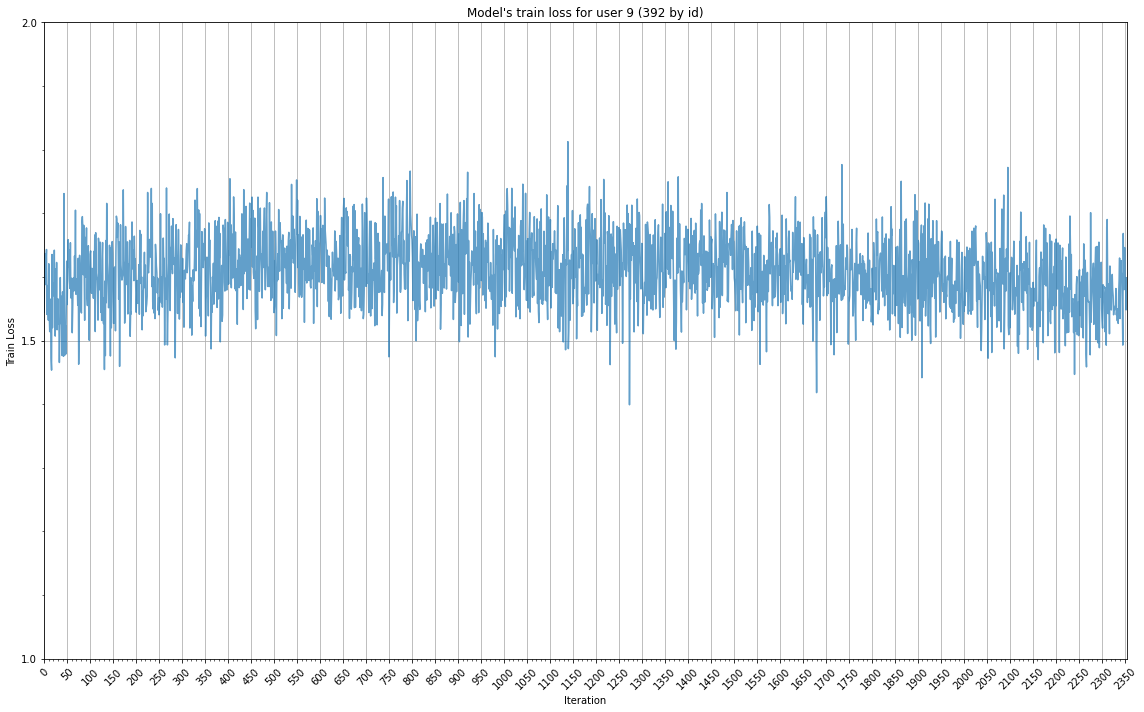

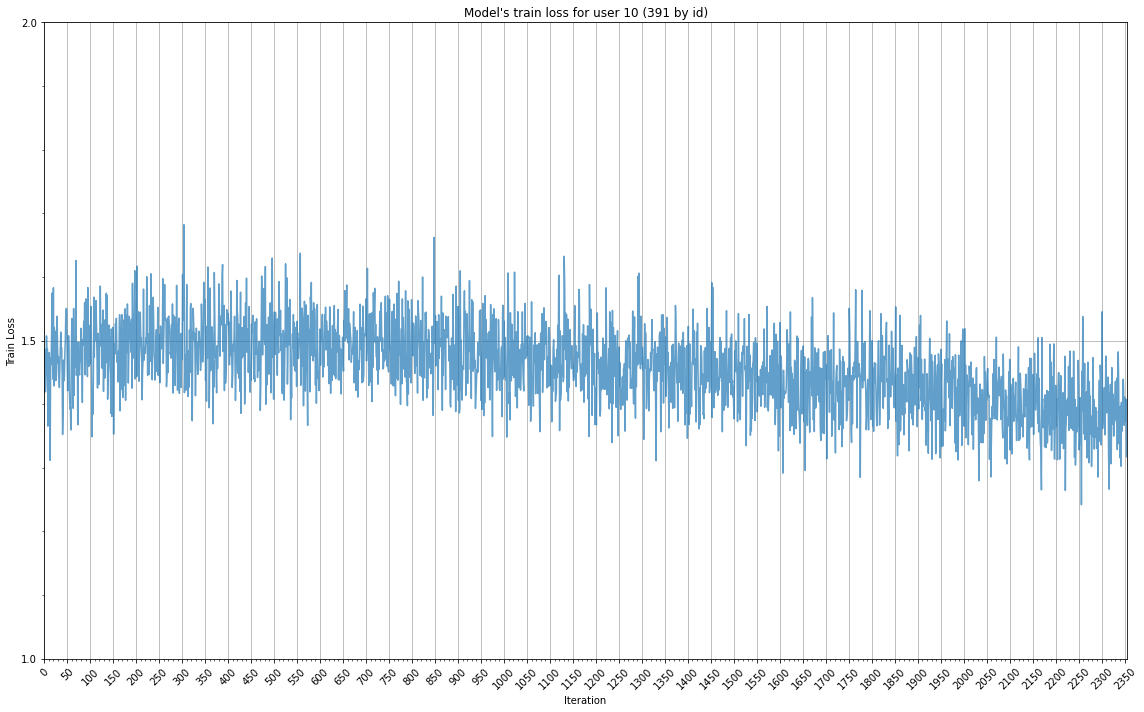

In [38]:
%matplotlib inline
for column in loss_400_df.columns:
    plot_single_train_loss(loss_400_df[column].dropna(), user_num = column)